<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/Mod%C3%A8le_de_regression_ML_ABRE_DE_DECISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # Détection plus rapide des fraudes à la carte de crédit à l'aide de : **Scikit Learn** et **Snap ML**






Nous utilserons deux modèles de classification populaires pour reconnaître les transactions frauduleuses par carte de crédit. Ces modèles sont : l’arbre de décision et la machine à vecteurs de support. On utilisera un ensemble de données réel pour entraîner chacun de ces modèles. L'ensemble de données comprend des informations sur la
transactions effectuées par carte de crédit en septembre 2013 par les titulaires de cartes européens. Vous On utilisera le modèle formé pour évaluer si une transaction par carte de crédit est légitime ou non.

Dans la session d'exercices en cours, vous pratiquerez non seulement l'interface Python Scikit-Learn, mais également l'API Python proposée par la bibliothèque Snap Machine Learning (Snap ML). Snap ML est une bibliothèque IBM hautes performances pour la modélisation ML. Il fournit des implémentations CPU/GPU très efficaces de modèles linéaires et de modèles arborescents. Snap ML accélère non seulement les algorithmes de ML grâce à la connaissance du système, mais il propose également de nouveaux algorithmes de ML avec la meilleure précision de leur catégorie. Pour plus d'informations, veuillez visiter la page d'informations [snapml](https://ibm.biz/BdPfxy).

<div id="Introduction">
     <h2>Le scénario</h2>
     <br>Imaginez que vous travaillez pour une institution financière et qu'une partie de votre travail consiste à créer un modèle qui prédit si une transaction par carte de crédit est frauduleuse ou non. Vous pouvez modéliser le problème comme un problème de classification binaire. Une transaction appartient à la classe positive (1) si elle est une fraude, sinon elle appartient à la classe négative (0).
     <br>
     <br>Vous avez accès aux transactions survenues sur une certaine période de temps. La majorité des transactions sont normalement légitimes et seule une petite fraction est non légitime. Ainsi, vous avez généralement accès à un ensemble de données très déséquilibré. C'est également le cas de l'ensemble de données actuel : seules 492 transactions sur 284 807 sont frauduleuses (la classe positive - les fraudes - représente 0,172 % de toutes les transactions).
     <br>
     <br>Pour entraîner le modèle, vous pouvez utiliser une partie de l'ensemble de données d'entrée et les données restantes peuvent être utilisées pour évaluer la qualité du modèle entraîné. Tout d’abord, téléchargeons l’ensemble de données.
     <br>
</div>

# Imortons l'ensemble des données et des librairies nécessaires

In [2]:
# Installons le package opendatasets
!pip install opendatasets

import opendatasets as od

# Le package vient de kaggle
# during download you will be required to input your Kaggle username and password
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Abort: ignored

In [3]:
# Snap ML est disponible en PyPI. Pour l'installer il faut exécuter le code ci-dessous.
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.7 MB/s eta 0:00:00


In [4]:
# Les librairies nécessaires pour ce projet
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

## L'analyse des données
Dans cette section, vous lirez l'ensemble de données dans une trame de données Pandas et visualiserez son contenu. Vous examinerez également certaines statistiques de données.

Remarque : Une trame de données Pandas est une structure de données tabulaire bidimensionnelle(ligne et colone), à taille variable et potentiellement hétérogène.



In [6]:
#Importons les bases de données
#raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
#print("Il y a " + str(len(raw_data)) +  "observations dans la bse des données de crédit de l'entreprise.")
#print("Il y a " + str(len(raw_data.columns)) +  " variable dans la base des données .")

# Observons les 5 premières de la base des données
#raw_data.head()

FileNotFoundError: ignored

Importer les données

In [7]:
#On peut aussi télécharger directement la base de donnée en utilisant le site de KAGGLE.

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
raw_data=pd.read_csv(url)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dans le monde réel, une institution financière a une base de donnée plus vaste. Pour refleter la réalité nous allons gonfler nos données 10 fois plus grandes.


In [8]:
n_replicas = 10

# Gonflons l'ensemble des données d'origines
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)
print("La bsase des données contient :", str(len(big_raw_data)), "observations")
print("La nouvelle base des données contient", str(len(big_raw_data.columns)), 'variables')

La bsase des données contient : 2848070 observations
La nouvelle base des données contient 31 variables


### Description de la base des données
Chaque ligne de l'ensemble de données représente une transaction par carte de crédit. Comme indiqué ci-dessus, chaque ligne comporte 31 variables. Une variable (la dernière variable du tableau ci-dessus) est appelée Classe et représente la variable cible. Notre objectif sera de former un modèle qui utilise les autres variables pour prédire la valeur de la variable Classe. Récupérons d'abord les statistiques de base sur la variable cible pour coprendre les données.

Remarque : Pour des raisons de confidentialité, les noms originaux de la plupart des fonctionnalités sont anonymisés V1, V2 .. V28. Les valeurs de ces caractéristiques sont le résultat d'une transformation PCA et sont numériques. La fonctionnalité 'Class' est la variable cible et elle prend deux valeurs : 1 en cas de fraude et 0 sinon. Pour plus d'informations sur l'ensemble de données, veuillez visiter cette page Web : https://www.kaggle.com/mlg-ulb/creditcardfraud.

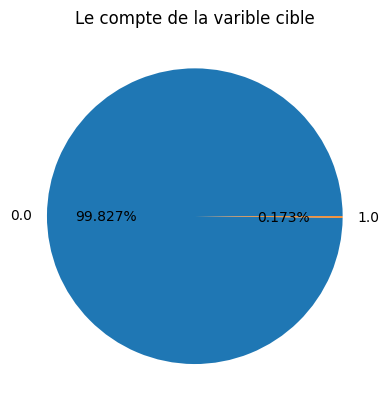

In [9]:
from numpy.lib.arraysetops import unique
# Observons les données de différentes classes
labels = big_raw_data.Class.unique()
labels
# regardons le nombre de chaque classe
sizes = big_raw_data.Class.value_counts().values
# Montrons graphiquement l'effectif de chaque classe
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title("Le compte de la varible cible")
plt.show()

Comme indiqué ci-dessus, la variable Class a deux valeurs : 0 (la transaction par carte de crédit est légitime) et 1 (la transaction par carte de crédit est frauduleuse). Ainsi, vous devez modéliser un problème de classification binaire. De plus, l’ensemble de données est très déséquilibré, les classes de variables cibles ne sont pas représentées de manière égale. Ce cas nécessite une attention particulière lors de la formation ou lors de l'évaluation de la qualité d'un modèle. Une façon de traiter ce cas au moment du train consiste à biaiser le modèle pour qu'il accorde plus d'attention aux échantillons de la classe minoritaire. Les modèles de l'étude actuelle seront configurés pour prendre en compte les poids de classe des échantillons au moment de l'entraînement/de l'ajustement.

Les transactions par carte de crédit ont des montants différents. Nous allons tracer un histogramme qui montre la répartition de ces montants. Quelle est la fourchette de ces montants (min/max) ? On va essayer de voir le 90e centile des valeurs des montants ?

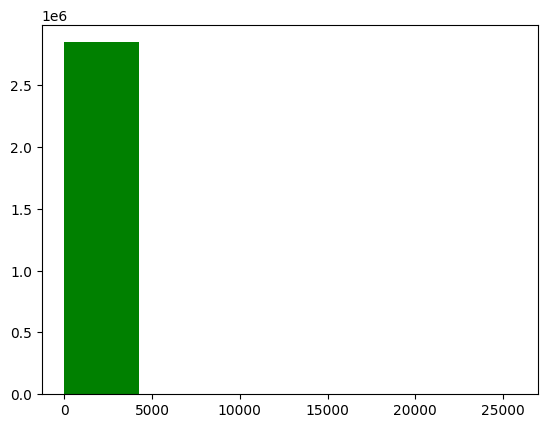

Le montant minimum de transtion est : 0.0
Le montant maximal de transaction est : 25691.16
Le 90 eme des transaction est égale à : 203.0


In [10]:
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()
print("Le montant minimum de transtion est :", np.min(big_raw_data.Amount.values))
print("Le montant maximal de transaction est :", np.max(big_raw_data.Amount.values))
print("Le 90 eme des transaction est égale à :", np.percentile(big_raw_data.Amount.values, 90))

## Prétraitement de l'ensemble des données
 Nous allons préparer les données pour l'entrainement du modèle. Le prétraitement des données tel que la mise à l'échelle/normalisation est généralement utile pour les modèles linéaires pour accélérer la convergence de la formation.

In [20]:
# standardiser les caractéristiques en soustraillant la moyenne et en mettant à l'échelle la variance unitaire
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:,1:30])
data_matrix = big_raw_data.values
# pour cette matrice, nous excluons le temps dans l'analyse
x=data_matrix[:, 1:30]

# y : labels
y = data_matrix[:,30]
# la normaisation des données
x = normalize(x, norm='l1')
# imprimer la forme de la matrice des caractéristiques et le vecteur des étiquettes
print("X.shape :", x.shape, "Y.shape :", y.shape)


X.shape : (2848070, 29) Y.shape : (2848070,)


## Données d'entrainement et données de test

Maintenant que l'ensemble de données est prêt à créer les modèles de classification, nous devons d'abord diviser l'ensemble de données prétraité en un sous-ensemble à utiliser pour entraîner le modèle (la rame) et un sous-ensemble à utiliser pour évaluer la qualité du modèle. (l'ensemble de test).

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape=', x_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', x_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


In [46]:
x_train.shape

(1993649, 29)

In [47]:
y_train.shape

(1993649,)

<div id="dt_sklearn">
     <h2>Créez un modèle de classificateur d'arbre de décision avec Scikit-Learn</h2>
</div>

Calculer les poids d'échantillonnage à utiliser comme entrée dans la routine d'entraînement afin qu'il prend en compte le déséquilibre de classes présent dans cet ensemble de données pour ne pas bien prédire une classe que l'autre.

In [48]:
from sklearn.utils.fixes import sklearn
from sklearn.utils import compute_class_weight
# calculer les poids d'échantillonnage à utiliser comme entrée dans la routine d'entraînement afin que
# il prend en compte le déséquilibre de classes présent dans cet ensemble de données
w_train = compute_sample_weight('balanced', y_train)

# importons l'algorythme d'abre de décision de scikit learn
from sklearn.tree import DecisionTreeClassifier
# définissons random_state sur une valeur entière donnée  pour une sortie reproductible sur plusieurs appels de fonction
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
# Entrainons l'abre de décision en utilisant Scikit learn
t0 = time.time()
sklearn_dt.fit(x_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  45.05013


<div id="dt_snapml">
     <h2>Créez un modèle de classificateur d'arbre de décision avec Snap ML</h2>
</div>

In [49]:
# si ce n'est pas déjà calculé,
# calculer les poids d'échantillonnage à utiliser comme entrée dans la routine d'entraînement afin que
# il prend en compte le déséquilibre de classes présent dans cet ensemble de données
# w_train = calculate_sample_weight('équilibré', y_train)

# importer le modèle de classificateur d'arbre de décision depuis Snap ML
from snapml import DecisionTreeClassifier

# Snap ML propose une formation multithread CPU/GPU des arbres de décision, contrairement à scikit-learn
# pour utiliser le GPU, définissez le paramètre use_gpu sur True
# snapml_dt = DecisionTreeClassifier (max_degree=4, random_state=45, use_gpu=True)

# pour définir le nombre de threads CPU utilisés au moment de la formation, définissez le paramètre n_jobs
# pour une sortie reproductible sur plusieurs appels de fonction, définissez random_state sur une valeur entière donnée
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)
# former un modèle de classificateur d'arbre de décision à l'aide de Snap ML
t0 = time.time()
snapml_dt.fit(x_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Temps(s) de formation : {0:.5f}".format(snapml_time))

[Snap ML] Temps(s) de formation : 7.88058


<div id="dt_sklearn_snapml">
     <h2>Évaluer les modèles de classificateur d'arbre de décision Scikit-Learn et Snap ML</h2>
</div>

In [56]:
# Accélération de la formation Snap ML vs Scikit-Learn
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))
# exécuter l'inférence et calculer les probabilités des échantillons de test
# appartenir à la classe des transactions frauduleuses
sklearn_pred = sklearn_dt.predict_proba(x_test)[:,1]
# évaluer la zone de calcul sous la caractéristique de fonctionnement du récepteur
# Score de la courbe (ROC-AUC) à partir des pronostics
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))
# exécuter l'inférence et calculer les probabilités des échantillons de test
# appartenir à la classe des transactions frauduleuses
snapml_pred = snapml_dt.predict_proba(x_test)[:,1]
# évaluer la zone de calcul sous la caractéristique de fonctionnement du récepteur
# Score de courbe (ROC-AUC) à partir des scores de prédiction
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 5.72x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


Comme indiqué ci-dessus, les deux modèles d'arbre de décision fournissent le même score sur l'ensemble de données de test. Cependant, Snap ML exécute la routine d'entraînement 12 fois plus rapidement que Scikit-Learn. C'est l'un des avantages de l'utilisation de Snap ML : accélération de la formation des modèles d'apprentissage automatique classiques, tels que les modèles linéaires et arborescents.

<div id="svm_sklearn">
     <h2>Créer un modèle de machine à vecteurs de support avec Scikit-Learn</h2>
</div>

In [57]:
# importer le modèle de machine à vecteurs de support linéaire (SVM) depuis Scikit-Learn
from sklearn.svm import LinearSVC

# instaurer un modèle SVM scikit-learn
# pour indiquer le déséquilibre des classes au moment de l'ajustement, définissez class_weight='balanced'
# pour une sortie reproductible sur plusieurs appels de fonction, définissez random_state sur une valeur entière donnée
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# former un modèle de machine à vecteurs de support linéaire à l'aide de Scikit-Learn
t0 = time.time()
sklearn_svm.fit(x_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Durée(s) de formation : {0:.2f}".format(sklearn_time))

[Scikit-Learn] Durée(s) de formation : 138.55


<div id="svm_snap">
     <h2>Créer un modèle de machine à vecteurs de support avec Snap ML</h2>
</div>

In [58]:
# importer le modèle de machine à vecteurs de support (SVM) depuis Snap ML
from snapml import SupportVectorMachine

# contrairement au LinearSVC de scikit-learn, Snap ML propose une formation CPU/GPU multithread des SVM
# pour utiliser le GPU, définissez le paramètre use_gpu sur True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# pour définir le nombre de threads utilisés au moment de la formation, il faut définir le paramètre n_jobs
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# former un modèle SVM à l'aide de Snap ML
t0 = time.time()
modèle = snapml_svm.fit(x_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Temps(s) de formation : {0:.2f}".format(snapml_time))

[Snap ML] Temps(s) de formation : 25.44


<div id="svm_sklearn_snap">
     <h2>Évaluer les modèles de machines vectorielles pris en charge par Scikit-Learn et Snap ML</h2>
</div>

In [59]:
# calcule l'accélération de la formation Snap ML vs Scikit-Learn
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Accélération de la formation Snap ML vs. Scikit-Learn : {0:.2f}x '.format(training_speedup))

# exécuter l'inférence à l'aide du modèle Scikit-Learn
# obtenir les scores de confiance pour les échantillons de test
sklearn_pred = sklearn_svm.decision_function(x_test)

# évaluer la précision sur l'ensemble de test
acc_sklearn = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] Score ROC-AUC : {0:.3f}".format(acc_sklearn))

# exécuter l'inférence à l'aide du modèle Snap ML
# obtenir les scores de confiance pour les échantillons de test
snapml_pred = snapml_svm.decision_function(x_test)

# évaluer la précision sur l'ensemble de test
acc_snapml = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] Score ROC-AUC : {0:.3f}".format(acc_snapml))

[Support Vector Machine] Accélération de la formation Snap ML vs. Scikit-Learn : 5.45x 
[Scikit-Learn] Score ROC-AUC : 0.984
[Snap ML] Score ROC-AUC : 0.985


Comme indiqué ci-dessus, des deux modèles SVM fournissent le même score sur l'ensemble de données de test. Cependant, comme dans le cas des arbres de décision, Snap ML exécute la routine de formation plus rapidement que Scikit-Learn. De plus, comme indiqué ci-dessus, non seulement Snap ML accélère de manière transparente les applications scikit-learn, mais l'API Python de la bibliothèque est également compatible avec les métriques scikit-learn et les préprocesseurs de données.

Dans cette section, nous évaluererons la qualité des modèles SVM formés ci-dessus à l'aide de la métrique de perte de charnière. Exécutez l'inférence sur l'ensemble de test à l'aide des modèles Scikit-Learn et Snap ML. Calculez la métrique de perte de charnière pour les deux ensembles de prédictions. Imprimez les pertes de charnière de Scikit-Learn et Snap ML.

In [60]:

# obtenir les scores de confiance pour les échantillons de test
sklearn_pred = sklearn_svm.decision_function(x_test)
snapml_pred = snapml_svm.decision_function(x_test)

# importer la métrique charnière_loss depuis scikit-learn
from sklearn.metrics import hinge_loss

# évaluer la perte de charnière à partir des prédictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Perte de charnière : {0:.3f}".format(loss_snapml))

# évaluer la métrique de perte de charnière à partir des prédictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Perte de charnière : {0:.3f}".format(loss_snapml))

# les deux modèles devraient donner la même perte de charnière

[Snap ML] Perte de charnière : 0.228
[Scikit-Learn] Perte de charnière : 0.228
